In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook studio il metodo per determinare l'eccentricità del disco.

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;"> Viscosità massima </span>

<center>

### Eccentricità binaria: e = 0.0

In [3]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e0 = np.zeros(7)
ecc_A2_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A2_e0[h] = rag.sum()/len(rag)
    ecc_A2_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e0[h], 3)))


Il raggio di troncamento è: 0.15 a.     L'eccentricità è pari a: 0.14
Il raggio di troncamento è: 0.218 a.     L'eccentricità è pari a: 0.14
Il raggio di troncamento è: 0.245 a.     L'eccentricità è pari a: 0.135
Il raggio di troncamento è: 0.298 a.     L'eccentricità è pari a: 0.135
Il raggio di troncamento è: 0.354 a.     L'eccentricità è pari a: 0.135
Il raggio di troncamento è: 0.387 a.     L'eccentricità è pari a: 0.13
Il raggio di troncamento è: 0.481 a.     L'eccentricità è pari a: 0.115


### Eccentricità binaria: e = 0.3

In [4]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e3 = np.zeros(7)
ecc_A2_e3 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A2_e3[h] = rag.sum()/len(rag)
    ecc_A2_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e3[h], 3)))


Il raggio di troncamento è: 0.119 a.     L'eccentricità è pari a: 0.101
Il raggio di troncamento è: 0.177 a.     L'eccentricità è pari a: 0.151
Il raggio di troncamento è: 0.198 a.     L'eccentricità è pari a: 0.154
Il raggio di troncamento è: 0.239 a.     L'eccentricità è pari a: 0.121
Il raggio di troncamento è: 0.269 a.     L'eccentricità è pari a: 0.085
Il raggio di troncamento è: 0.304 a.     L'eccentricità è pari a: 0.114
Il raggio di troncamento è: 0.384 a.     L'eccentricità è pari a: 0.096


### Eccentricità binaria: e = 0.6

In [5]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e6 = np.zeros(7)
ecc_A2_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A2_e6[h] = rag.sum()/len(rag)
    ecc_A2_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e6[h], 3)))


Il raggio di troncamento è: 0.071 a.     L'eccentricità è pari a: 0.082
Il raggio di troncamento è: 0.104 a.     L'eccentricità è pari a: 0.195
Il raggio di troncamento è: 0.121 a.     L'eccentricità è pari a: 0.186
Il raggio di troncamento è: 0.142 a.     L'eccentricità è pari a: 0.112
Il raggio di troncamento è: 0.163 a.     L'eccentricità è pari a: 0.103
Il raggio di troncamento è: 0.184 a.     L'eccentricità è pari a: 0.091
Il raggio di troncamento è: 0.237 a.     L'eccentricità è pari a: 0.132


<center>

# <span style="color:blue;"> Viscosità media </span>

<center>

### Eccentricità binaria: e = 0.0

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)
ecc_A3_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        print(len(ecc))
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A3_e0[h] = rag.sum()/len(rag)
    ecc_A3_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e0[h], 3)))


3994
4593
4218
4141
4021
4428
4612
3872
4666
4144
4365
4017
4293
4773
4023
3423
4191
4194
4316
4652
4397
4629
3696
4204
3946
4458
4254
3984
4156
4258
4570
4654
4043
4326
4319
4443
4113
3849
4671
4084
4356
Il raggio di troncamento è: 0.131 a.     L'eccentricità è pari a: 0.106
3760
3995
3797
3785
4012
3895
3974
3765
3969
3481
4072
4878
4687
3570
3981
3474
4341
4108
3774
4078
4675
3822
3887
3907
4105
3919
3911
3975
4312
3982
4370
4225
3959
4361
3948
4841
4265
4121
3937
3911
4130
Il raggio di troncamento è: 0.194 a.     L'eccentricità è pari a: 0.097
4044
5027
4283
4874
4498
4614
4416
4250
4909
3746
5053
3743
5031
3835
4948
3999
4233
4228
3989
4563
3788
4754
3705
4773
3845
4672
3670
4397
3764
4034
4023
3835
4281
3649
4760
3638
4823
3624
4592
3679
4287
Il raggio di troncamento è: 0.22 a.     L'eccentricità è pari a: 0.096
2270
2098
1859
2151
2064
2258
2011
2106
2281
2774
2023
2112
2328
2151
1803
2220
2178
2512
1967
2101
1888
2082
2055
1856
1930
2136
2688
2036
2359
2003
2240
2489
2133
2076


### Eccentricità binaria: e = 0.3

In [7]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e3 = np.zeros(7)
ecc_A3_e3 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A3_e3[h] = rag.sum()/len(rag)
    ecc_A3_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e3[h], 3)))


Il raggio di troncamento è: 0.102 a.     L'eccentricità è pari a: 0.086
Il raggio di troncamento è: 0.152 a.     L'eccentricità è pari a: 0.121
Il raggio di troncamento è: 0.171 a.     L'eccentricità è pari a: 0.117
Il raggio di troncamento è: 0.207 a.     L'eccentricità è pari a: 0.1
Il raggio di troncamento è: 0.245 a.     L'eccentricità è pari a: 0.084
Il raggio di troncamento è: 0.271 a.     L'eccentricità è pari a: 0.095
Il raggio di troncamento è: 0.34 a.     L'eccentricità è pari a: 0.108


### Eccentricità binaria: e = 0.6

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e6 = np.zeros(7)
ecc_A3_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A3_e6[h] = rag.sum()/len(rag)
    ecc_A3_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e6[h], 3)))


Il raggio di troncamento è: 0.061 a.     L'eccentricità è pari a: 0.074
Il raggio di troncamento è: 0.091 a.     L'eccentricità è pari a: 0.137
Il raggio di troncamento è: 0.103 a.     L'eccentricità è pari a: 0.134
Il raggio di troncamento è: 0.122 a.     L'eccentricità è pari a: 0.103
Il raggio di troncamento è: 0.144 a.     L'eccentricità è pari a: 0.094
Il raggio di troncamento è: 0.159 a.     L'eccentricità è pari a: 0.104
Il raggio di troncamento è: 0.201 a.     L'eccentricità è pari a: 0.105


<center>

# <span style="color:blue;"> Viscosità minima </span>

<center>

### Eccentricità binaria: e = 0.0

In [9]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e0 = np.zeros(7)
ecc_A4_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A4_e0[h] = rag.sum()/len(rag)
    ecc_A4_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e0[h], 3)))


Il raggio di troncamento è: 0.127 a.     L'eccentricità è pari a: 0.083
Il raggio di troncamento è: 0.185 a.     L'eccentricità è pari a: 0.092
Il raggio di troncamento è: 0.209 a.     L'eccentricità è pari a: 0.101
Il raggio di troncamento è: 0.259 a.     L'eccentricità è pari a: 0.096
Il raggio di troncamento è: 0.307 a.     L'eccentricità è pari a: 0.103
Il raggio di troncamento è: 0.341 a.     L'eccentricità è pari a: 0.105
Il raggio di troncamento è: 0.443 a.     L'eccentricità è pari a: 0.083


### Eccentricità binaria: e = 0.3

In [10]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e3 = np.zeros(7)
ecc_A4_e3 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A4_e3[h] = rag.sum()/len(rag)
    ecc_A4_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e3[h], 3)))


Il raggio di troncamento è: 0.095 a.     L'eccentricità è pari a: 0.09
Il raggio di troncamento è: 0.141 a.     L'eccentricità è pari a: 0.115
Il raggio di troncamento è: 0.159 a.     L'eccentricità è pari a: 0.108
Il raggio di troncamento è: 0.198 a.     L'eccentricità è pari a: 0.101
Il raggio di troncamento è: 0.234 a.     L'eccentricità è pari a: 0.087
Il raggio di troncamento è: 0.259 a.     L'eccentricità è pari a: 0.091
Il raggio di troncamento è: 0.324 a.     L'eccentricità è pari a: 0.111


### Eccentricità binaria: e = 0.6

In [11]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e6 = np.zeros(7)
ecc_A4_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1])
        ecc = eps[mask] * mass[mask]
        ecc_out[k] = ecc.sum() / mass[mask].sum()

    sax_A4_e6[h] = rag.sum()/len(rag)
    ecc_A4_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e6[h], 3)))


Il raggio di troncamento è: 0.056 a.     L'eccentricità è pari a: 0.07
Il raggio di troncamento è: 0.083 a.     L'eccentricità è pari a: 0.114
Il raggio di troncamento è: 0.094 a.     L'eccentricità è pari a: 0.108
Il raggio di troncamento è: 0.117 a.     L'eccentricità è pari a: 0.107
Il raggio di troncamento è: 0.138 a.     L'eccentricità è pari a: 0.114
Il raggio di troncamento è: 0.153 a.     L'eccentricità è pari a: 0.122
Il raggio di troncamento è: 0.193 a.     L'eccentricità è pari a: 0.14


<center>

# <span style="color:red;"> Eccentricità del disco: funzione della viscosità </span>

<center>

### Viscosità massima

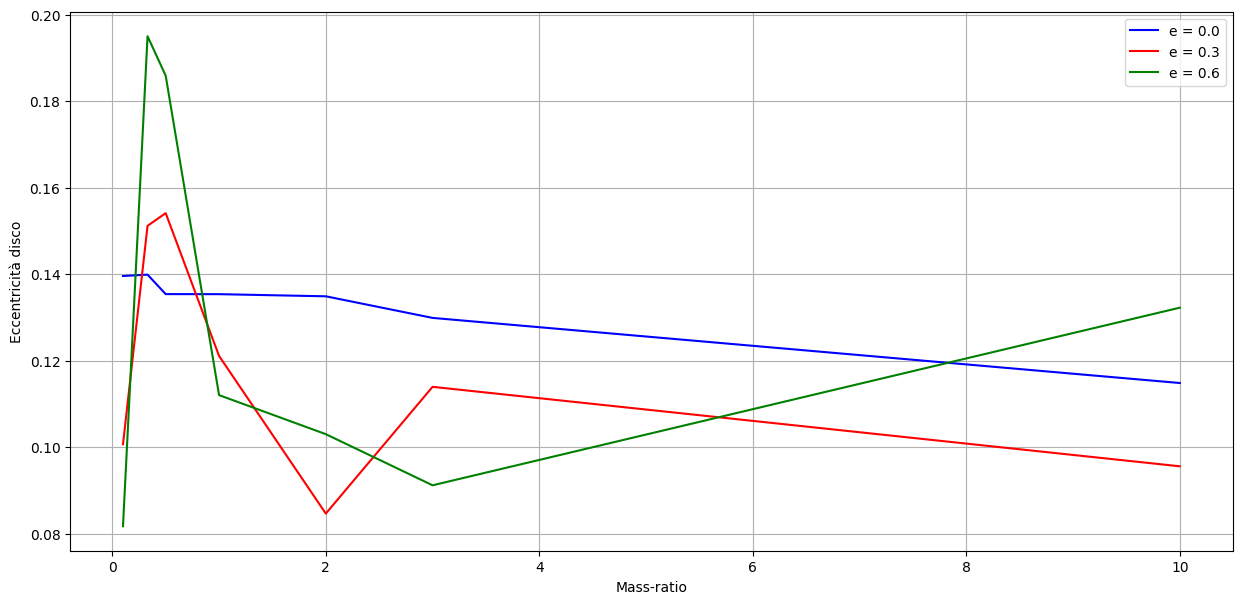

In [12]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A2_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(massr, ecc_A2_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, ecc_A2_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Viscosità media

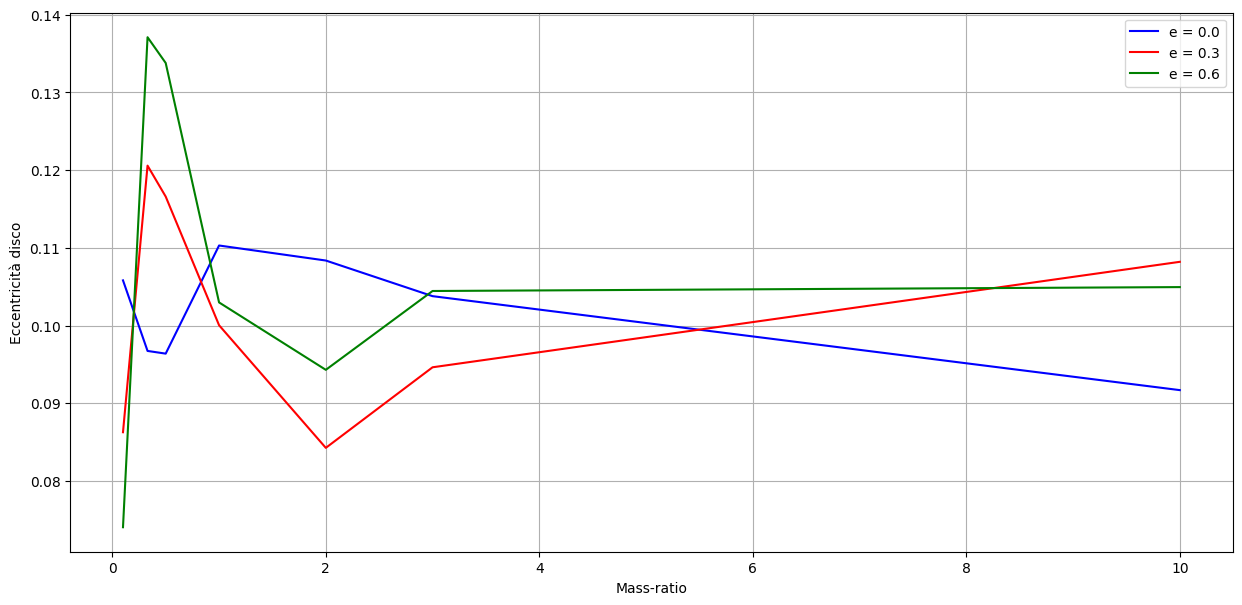

In [13]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A3_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(massr, ecc_A3_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, ecc_A3_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Viscosità minima

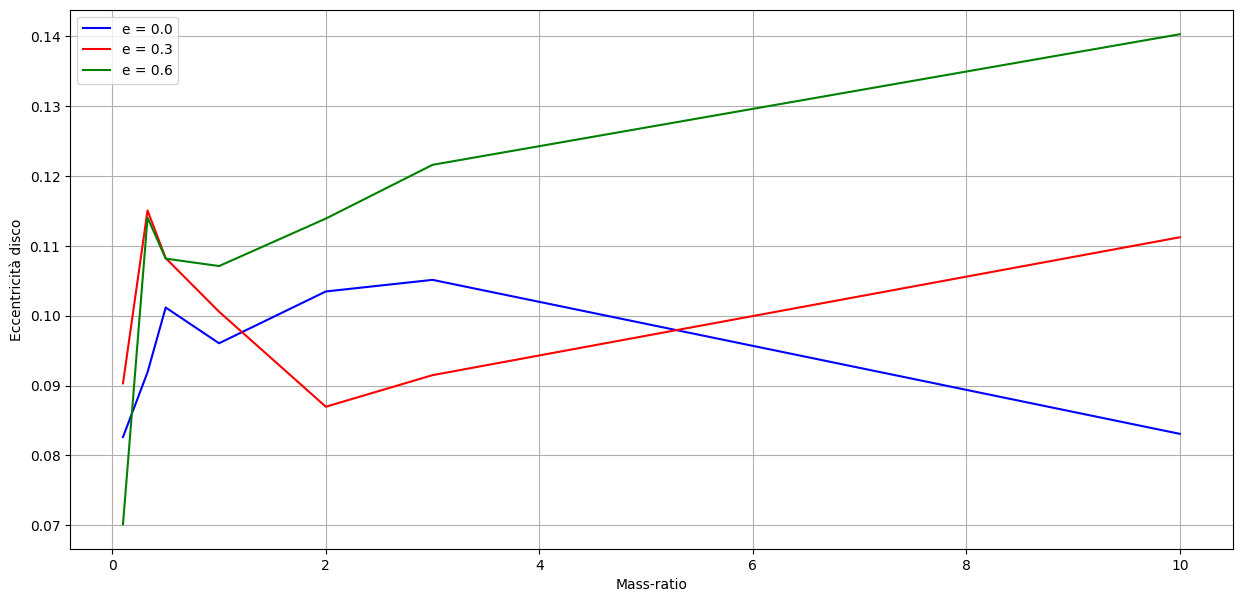

In [14]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A4_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(massr, ecc_A4_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(massr, ecc_A4_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

# <span style="color:red;"> Eccentricità del disco: funzione dell'eccentricità della binaria </span>

<center>

### Eccentricità nulla

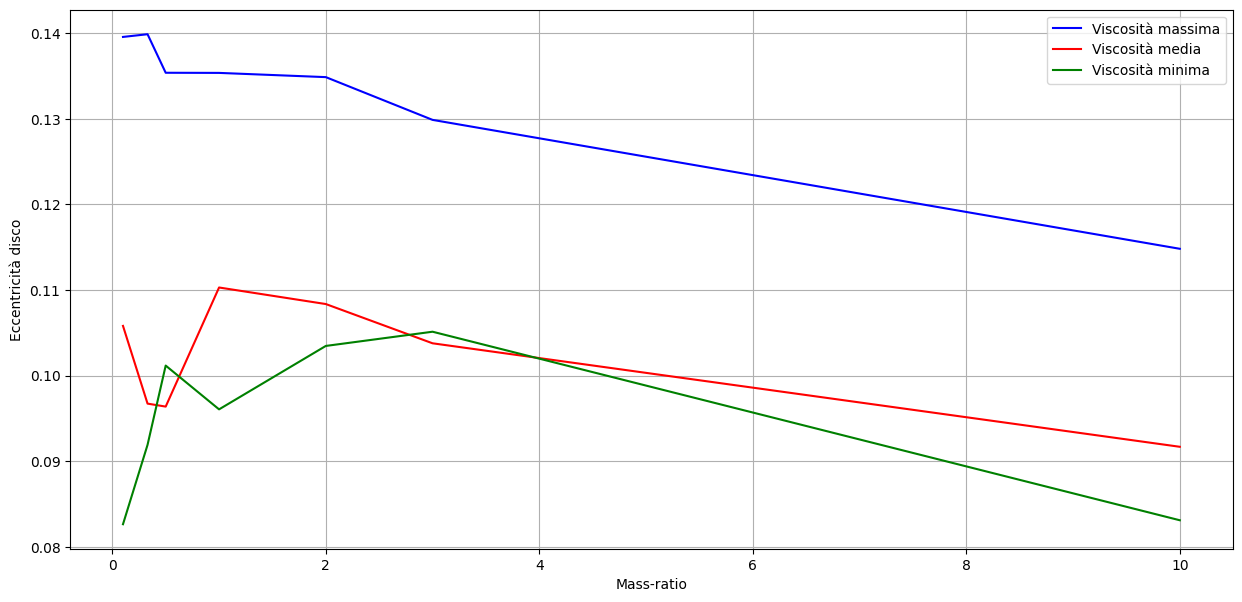

In [15]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A2_e0, color = 'blue', label='Viscosità massima')
# Eccentricità media
plt.plot(massr, ecc_A3_e0, color = 'red', label='Viscosità media')
# Eccentricità massima
plt.plot(massr, ecc_A4_e0, color = 'green', label='Viscosità minima')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Eccentricità media

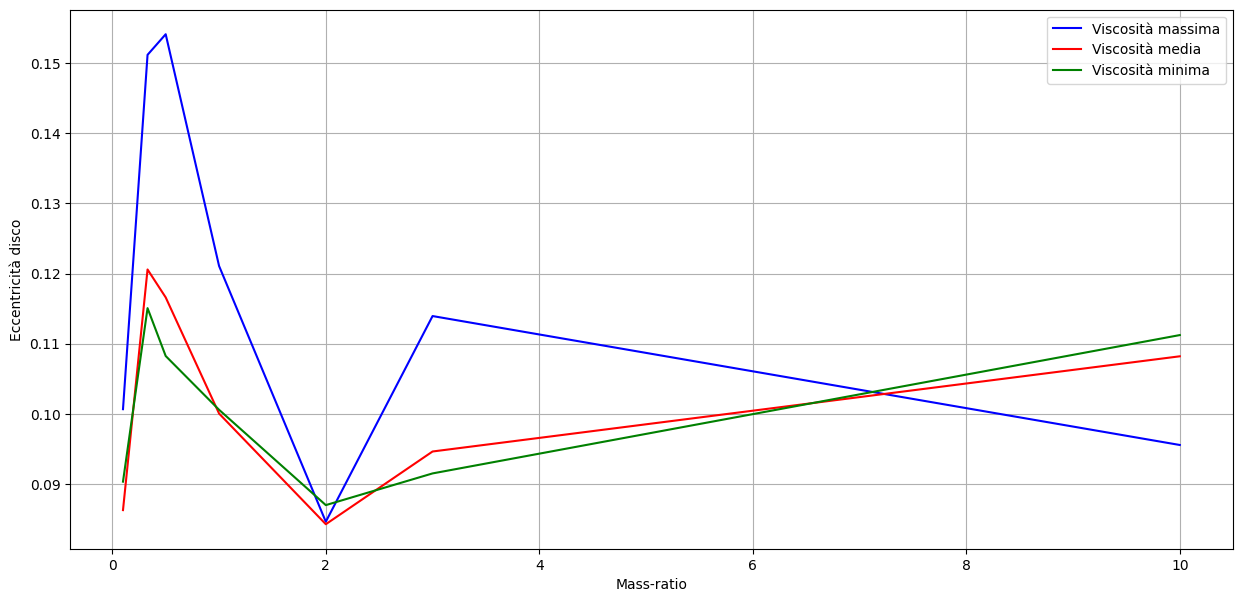

In [16]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A2_e3, color = 'blue', label='Viscosità massima')
# Eccentricità media
plt.plot(massr, ecc_A3_e3, color = 'red', label='Viscosità media')
# Eccentricità massima
plt.plot(massr, ecc_A4_e3, color = 'green', label='Viscosità minima')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Eccentricità massima

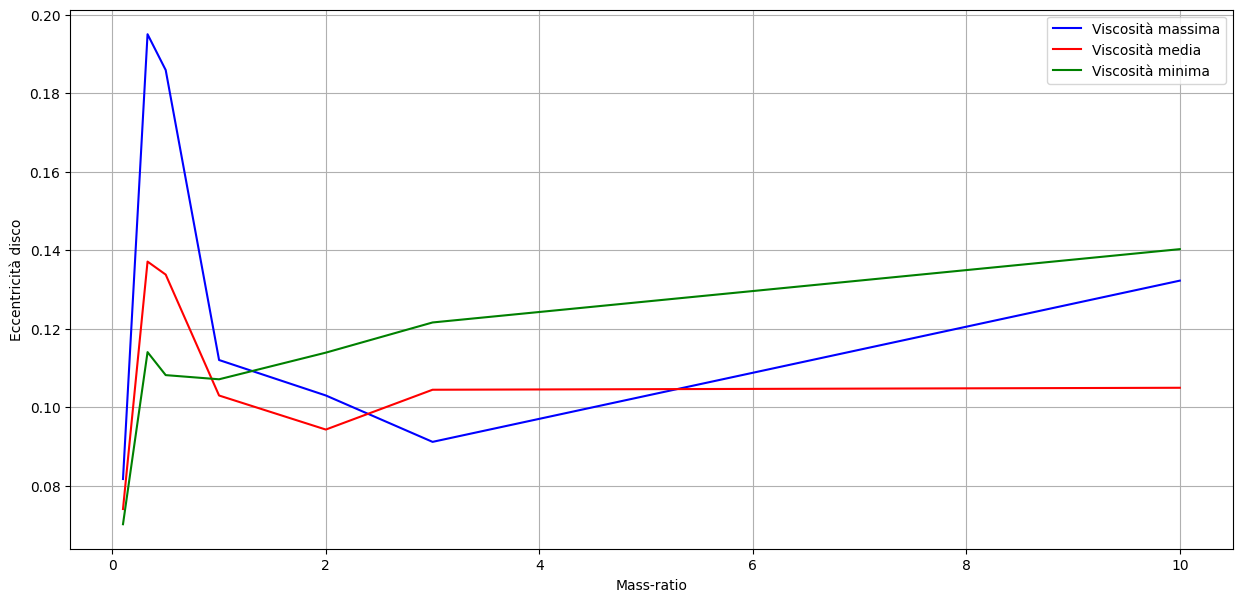

In [17]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(massr, ecc_A2_e6, color = 'blue', label='Viscosità massima')
# Eccentricità media
plt.plot(massr, ecc_A3_e6, color = 'red', label='Viscosità media')
# Eccentricità massima
plt.plot(massr, ecc_A4_e6, color = 'green', label='Viscosità minima')


# Aggiungere etichette agli assi
plt.xlabel('Mass-ratio')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

# <span style="color:red;"> Eccentricità del disco vs semi-asse maggiore: funzione della viscosità </span>

<center>

### Viscosità massima

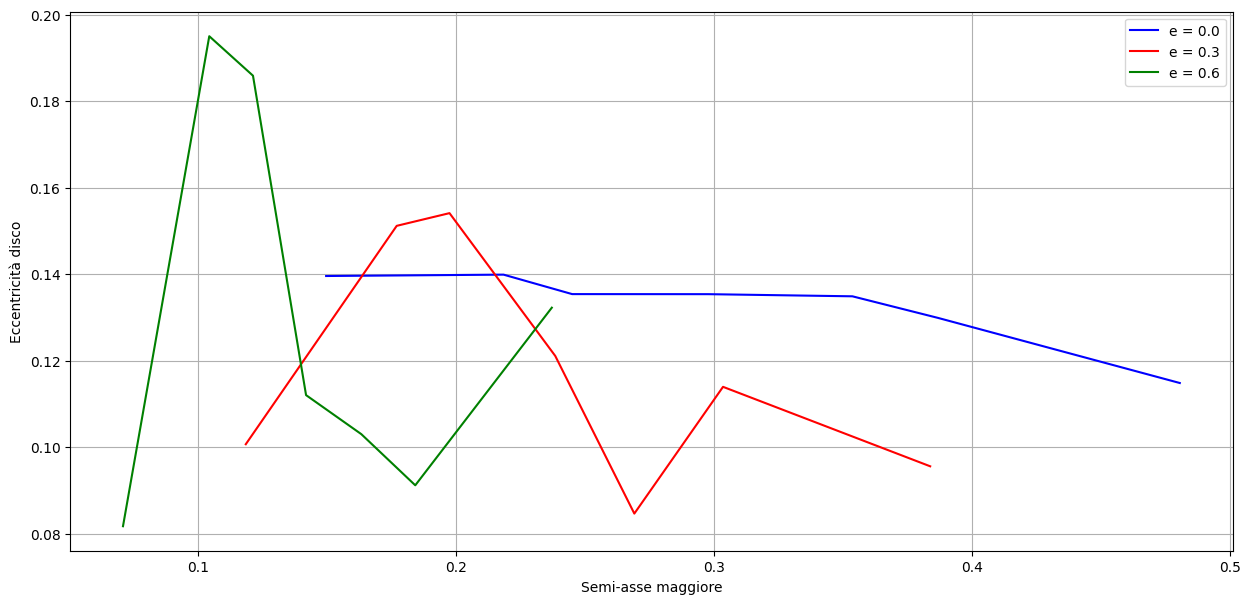

In [18]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(sax_A2_e0, ecc_A2_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(sax_A2_e3, ecc_A2_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(sax_A2_e6, ecc_A2_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Viscosità media

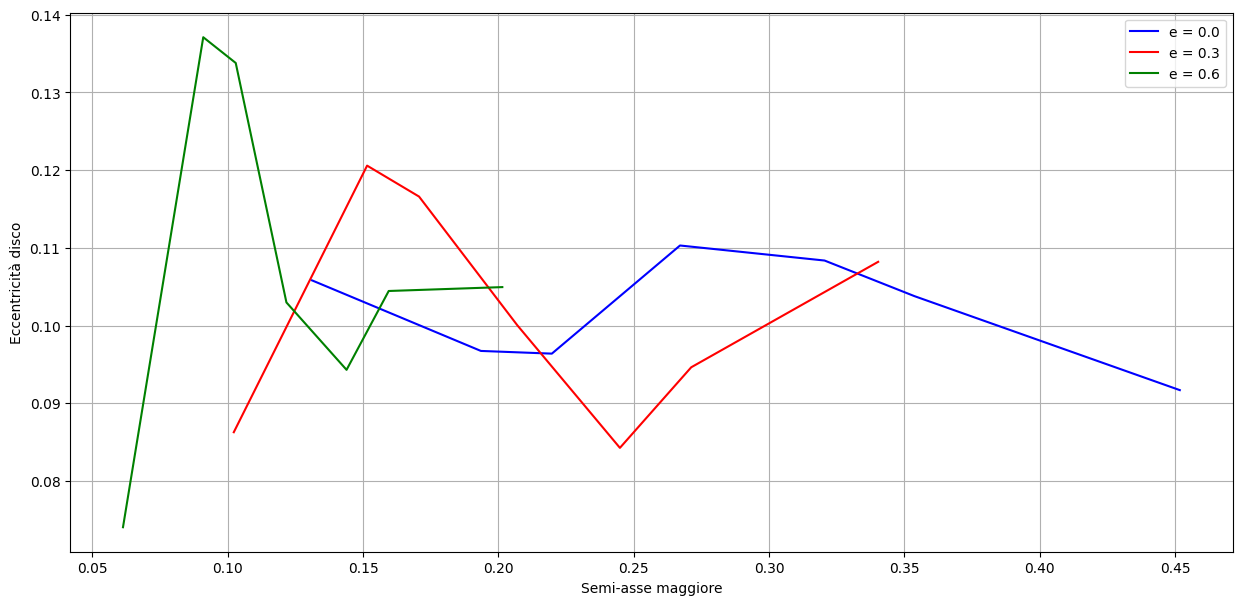

In [19]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(sax_A3_e0, ecc_A3_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(sax_A3_e3, ecc_A3_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(sax_A3_e6, ecc_A3_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

### Viscosità minima

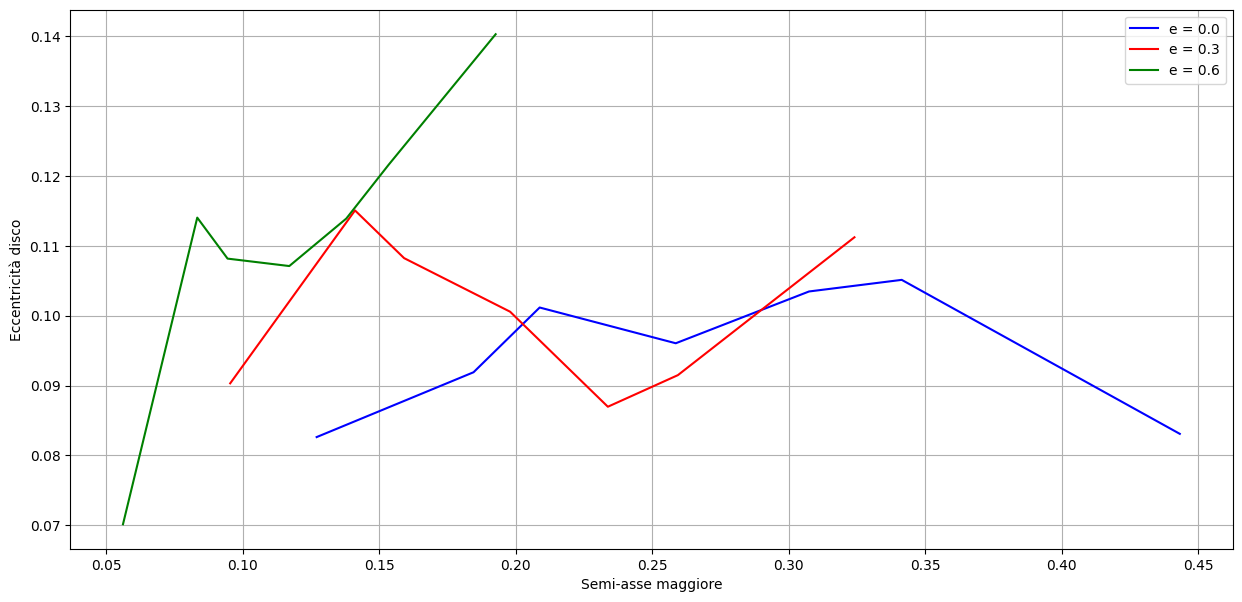

In [20]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

# Nessuna eccentricità
plt.plot(sax_A4_e0, ecc_A4_e0, color = 'blue', label='e = 0.0')
# Eccentricità media
plt.plot(sax_A4_e3, ecc_A4_e3, color = 'red', label='e = 0.3')
# Eccentricità massima
plt.plot(sax_A4_e6, ecc_A4_e6, color = 'green', label='e = 0.6')


# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Eccentricità disco')

# Aggiungere una legenda
plt.legend()

# Visualizzare il plot
plt.grid(True)
plt.show()

<center>

# <span style="color:red;"> Scatter plot riassuntivo </span>

<center>

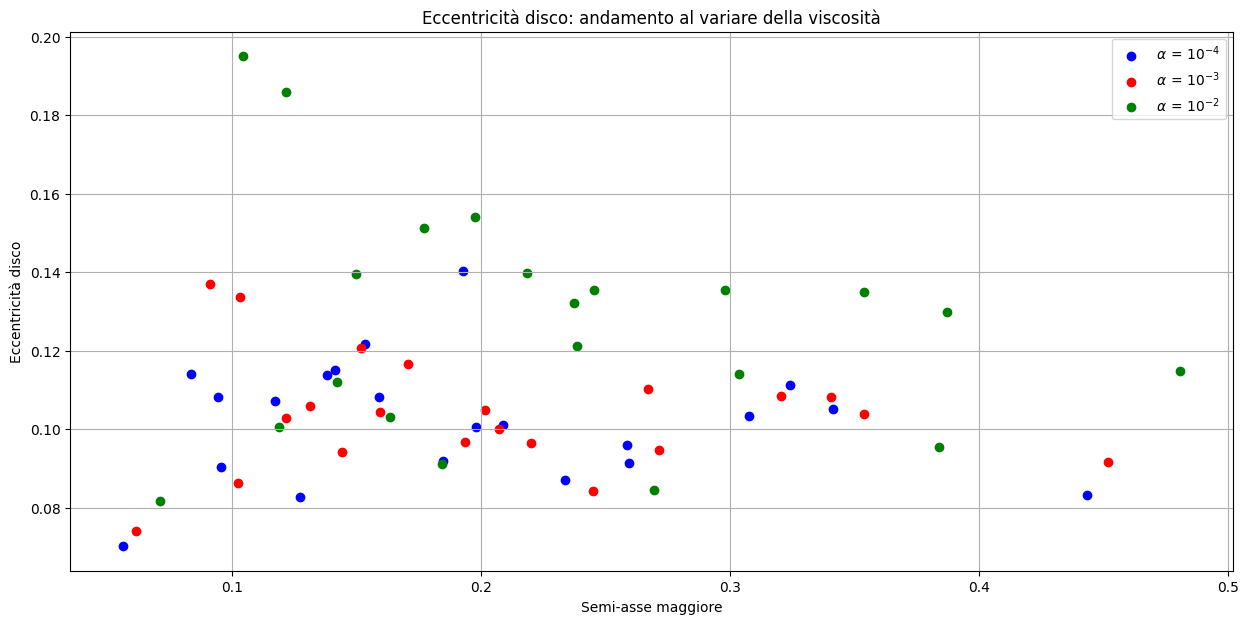

In [21]:
fig = plt.figure(figsize=(15, 7))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

#-------------------------------------------#
#             Viscosità minima              #
#-------------------------------------------#
plt.scatter(sax_A4_e0, ecc_A4_e0, color = 'blue', label=r'$\alpha\,=\,10^{-4}$')
plt.scatter(sax_A4_e3, ecc_A4_e3, color = 'blue')
plt.scatter(sax_A4_e6, ecc_A4_e6, color = 'blue')

#-------------------------------------------#
#             Viscosità media               #
#-------------------------------------------#
plt.scatter(sax_A3_e0, ecc_A3_e0, color = 'red', label=r'$\alpha\,=\,10^{-3}$')
plt.scatter(sax_A3_e3, ecc_A3_e3, color = 'red')
plt.scatter(sax_A3_e6, ecc_A3_e6, color = 'red')

#-------------------------------------------#
#             Viscosità massima             #
#-------------------------------------------#
plt.scatter(sax_A2_e0, ecc_A2_e0, color = 'green', label=r'$\alpha\,=\,10^{-2}$')
plt.scatter(sax_A2_e3, ecc_A2_e3, color = 'green')
plt.scatter(sax_A2_e6, ecc_A2_e6, color = 'green')



# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Eccentricità disco')
plt.title('Eccentricità disco: andamento al variare della viscosità')

# Aggiungere una legenda
plt.legend()

# Visualizzare il scatter
plt.grid(True)
plt.show()